# Data Visualizition

<font color = "green">

1. [Seaborn](#1)
    * Bar Plot

### Seaborn

<a id = "1"></a>

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read Data

median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_high_school = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
race = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [6]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [7]:
percentage_people_below_poverty_level.poverty_rate.replace(["-"], 0.0, inplace=True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level["Geographic Area"].unique())
area_list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [8]:
len(area_list)

51

In [9]:
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

In [10]:
data = pd.DataFrame({"area_list": area_list, "area_poverty_ratio": area_poverty_ratio})
new_index = (data["area_poverty_ratio"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

Text(0.5, 1.0, 'Poverty Rate Given States')

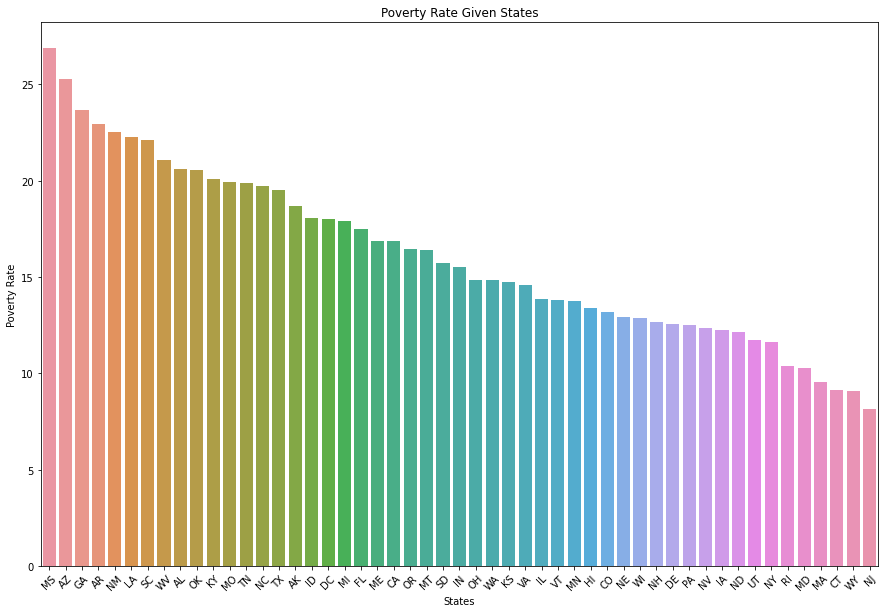

In [11]:
# visualization

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data["area_list"], y=sorted_data["area_poverty_ratio"])
plt.xticks(rotation=45)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")

In [12]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [13]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [14]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [15]:
# Most Common 15 Name or Surname of Killed People

from typing import Counter


separate = kill.name[kill.name != "TK TK"].str.split()
a,b = zip(*separate)
name_list = a+b
name_count = Counter(name_list)
most_common = name_count.most_common(15)
x,y = zip(*most_common)
x,y = list(x), list(y)

Text(0.5, 1.0, 'Most Common 15 Name or Surname of Killed People')

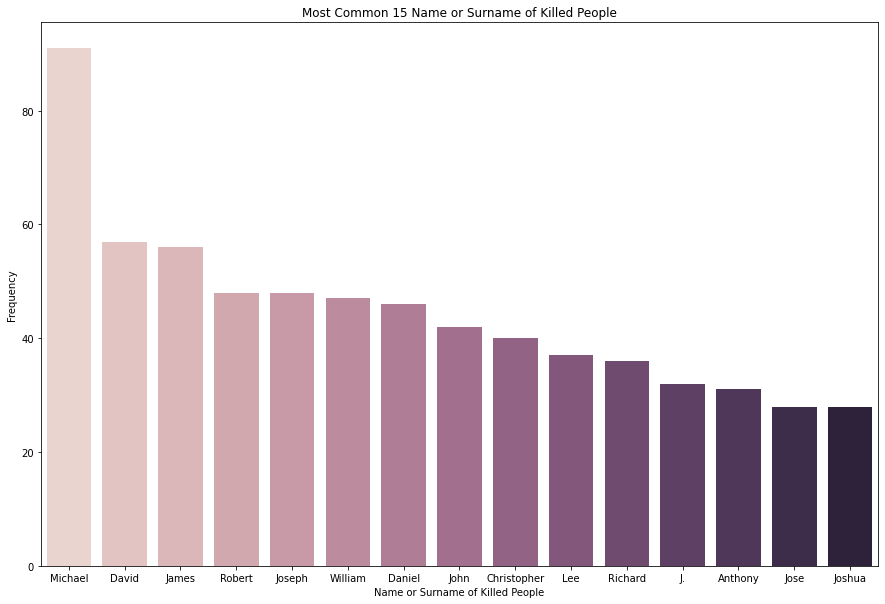

In [16]:
# Visualizition

plt.figure(figsize = (15,10))
sns.barplot(x=x, y=y, palette=sns.cubehelix_palette(len(x)))
plt.xlabel("Name or Surname of Killed People")
plt.ylabel("Frequency")
plt.title("Most Common 15 Name or Surname of Killed People")

In [19]:
percent_over_25_completed_high_school.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [29]:
percent_over_25_completed_high_school.percent_completed_hs.replace(["-"], None, inplace=True)
percent_over_25_completed_high_school.percent_completed_hs.dropna(inplace=True)
percent_over_25_completed_high_school.percent_completed_hs = percent_over_25_completed_high_school.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_high_school["Geographic Area"].unique())

area_highschool = []
for i in area_list:
    x = percent_over_25_completed_high_school[percent_over_25_completed_high_school["Geographic Area"] == i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

#sorting

data = pd.DataFrame({"area_list": area_list, "area_highschool_ratio": area_highschool})
new_index = (data["area_highschool_ratio"].sort_values(ascending=True)).index.values
sorted_data = data.reindex(new_index)

Text(0, 0.5, 'High School Graduate Rate')

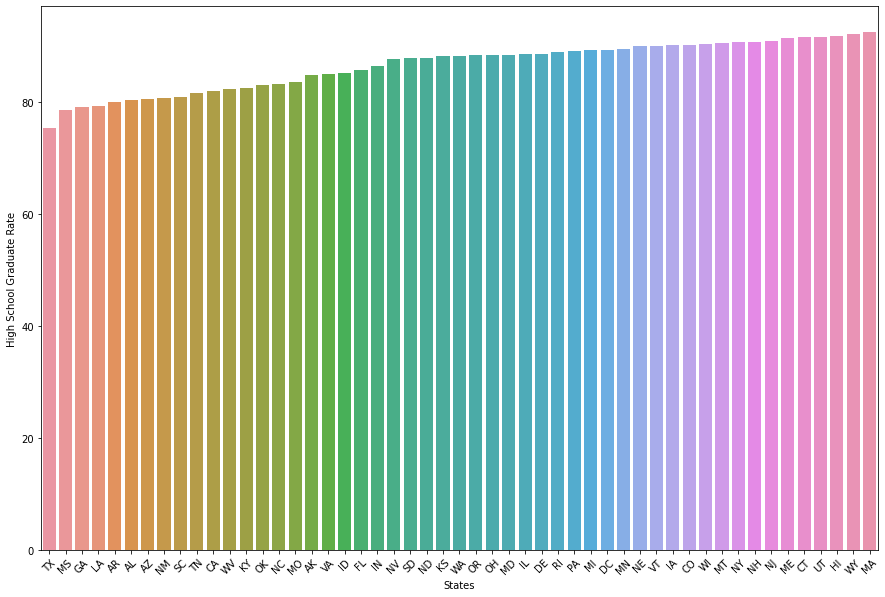

In [38]:
# Visualization

plt.figure(figsize=(15,10))
sns.barplot(x = sorted_data["area_list"], y = sorted_data["area_highschool_ratio"])
plt.xticks(rotation = 45)
plt.xlabel("States")
plt.ylabel("High School Graduate Rate")